<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.

Apply at https://developer.twitter.com/en/apply-for-access.html. Where asked state that you will use the app as a student to explore the tweepy Python library and use it to fetch recent tweets and to create/delete a tweet.

### 2. Create Your Twitter App
Go to https://developer.twitter.com/en/portal/projects-and-apps and click on the "+ Create App" button. Give your app a name and then you will be able to generate Consumer Keys (API key & secret) and Authentication Tokens (Access token & secret). Copy-paste these authentication details for use in this lab.

### 3. Load Python Libraries

In [1]:
!pip install tweepy

In [6]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [1]:
my_consumer_key = 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
my_consumer_secret = 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
my_access_token = '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string) goes in here
access_token_secret = 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here

In [2]:
import json

auth_twitter_json = {
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
    , 'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
    , 'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string goes in here
    , 'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here
}

with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`   "consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token": "your access token (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [3]:
pwd()  # make sure your working directory is where the file is

'C:\\Users\\Mai Anh\\Documents\\IOD\\Course Content - v 1.1\\Module 2\\Labs 2\\Lab Answers'

In [7]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
pp.pprint(auth)

{   'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr',
    'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW',
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d',
    'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'}


In [8]:
my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [9]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [10]:
api.followers()[0]._json

{'id': 1169320255375781888,
 'id_str': '1169320255375781888',
 'name': 'Abdυlra7mαn 🌐',
 'screen_name': 'Abdulra7man_M_H',
 'location': '',
 'description': '#Freelance_Translator (En🔄Ar) |                          \n#Logo_Designer 🎨 | #Video_Editor 🎞 | ve Türk dilini seviyorum',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 206,
 'friends_count': 1897,
 'listed_count': 0,
 'created_at': 'Wed Sep 04 18:44:27 +0000 2019',
 'favourites_count': 350,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 149,
 'lang': None,
 'status': {'created_at': 'Mon Jun 01 00:58:26 +0000 2020',
  'id': 1267259174687301632,
  'id_str': '1267259174687301632',
  'text': '#مكتشف_علاج\nمن عجائب زمن #كورونا أن يظهر بين حين وآخر اسم جديد لمكتشف علاج همشته الحكومات، بينما يرتكز تقدم العلم ا… https://t.co/Is42HMmTzT',
  'truncated': True,
  'entities': {'hashtags': [{'text': 'مكتشف_علاج', 'indices': [0, 11]},
  

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

In [25]:
# Retrieve a Twitter user object
obama = api.get_user('barackobama')

In [33]:
obama.status

Status(_api=<tweepy.api.API object at 0x000002B06D723A88>, _json={'created_at': 'Fri May 29 16:06:54 +0000 2020', 'id': 1266400635429310466, 'id_str': '1266400635429310466', 'text': 'My statement on the death of George Floyd: https://t.co/Hg1k9JHT6R', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1266400446517829633, 'id_str': '1266400446517829633', 'indices': [43, 66], 'media_url': 'http://pbs.twimg.com/media/EZMofxYXYAELmWd.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EZMofxYXYAELmWd.jpg', 'url': 'https://t.co/Hg1k9JHT6R', 'display_url': 'pic.twitter.com/Hg1k9JHT6R', 'expanded_url': 'https://twitter.com/BarackObama/status/1266400635429310466/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 1098, 'resize': 'fit'}, 'small': {'w': 680, 'h': 622, 'resize': 'fit'}, 'large': {'w': 1226, 'h': 1122, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [

This will fetch recent tweets from accounts you follow:

In [11]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

RT @ACABNATlON: PERRY THE PLATYPUS IS A BASTARD https://t.co/KRXrbMVELT
RT @cricmash: 1 June 2002 Hansie Cronje crashes to his death 
by @senantix 

#cricket #onthisday #death

https://t.co/uxUpuZUtps
1 June 2002 Hansie Cronje crashes to his death 
#cricket #onthisday 

https://t.co/dcgnjoHrZ4
This morning's @EveningStandard #protests2020 #BlackLivesMatter #GeorgeFloyd #Christo #cartoon https://t.co/1MB2U8C5X1
*Ding ding* In the blue corner... @brendan_pang! #MasterChefAU https://t.co/uEAGAvX8vK
RT @cricmash: 1 June 1887 When batsmen threw their wickets away because there was no concept of declaration 
by @ovshake42 

#cricket #onth…
andyzing: 2x 20KG Adjustable Dumbbell/Barbell $85.40 + Shipping @ Dshop https://t.co/RfYOhhmepe
On this day: Born June 2, 1980: Abby Wambach, American soccer player https://t.co/bVuCl4zSiZ https://t.co/es03j2L1GG
Pristine Solar: [VIC] 6.6kW Jinko 370W Solar Panels + 5kW Fronius Inverter Fully Installed from $3,511 ($1,623 Upfr… https://t.co/2k6fdMNHkJ
bobb

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [12]:
#ANSWER:
# Your recent tweets:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

Best! #LotrReunion https://t.co/UERxUXQiY6
@robelinda2 No wonder he skips tour in sub-continent.
@ovshake42 @realDonaldTrump 😂
Until today IELTS was the most useless exam I passed. Now it's SCRUM Master Certified. #ScrumStudy #TimeWaste
কোন এক সময় যদি ফিজি অস্ট্রেলিয়ার অংশ হয়ে যায়, তখন কী ফিজির চাঁদ দেখে সিডনিতে ঈদ করা যাবে?
সিডনি থেকে ফিজির দূরত্ব ~৩০০০ কিমি। সিডনি থেকে পার্থের দূরত্ব ~৪০০০ কিমি। পার্থে চাঁদ দেখলে চাঁদ দেখা কমিটি সিডনিতে… https://t.co/YNsa7KhWVB
@moonsightingau https://t.co/cqGge8pKXs
@ovshake42 @shoaib100mph usually talks shit. This is no different.
Best!

https://t.co/pAD1nIvvL6
RT @thedancingbogan: @LiebCricket Facts...Waugh was Australia’s greatest ever captain, he lead the greatest Australian cricket ever, Warne…
RT @cricketingview: Kohli shouldn't have got past Shakib-Al-Hasan. Kohli's just an average T20 bat. Shakib is an average bat and bowler in…
@BarrettSeller https://t.co/EZrLeGNGYi
Sweaters. Hero.

#RishiKapoor
RT @TheAcademy: A mainstay of Bollywood c

Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [13]:
#ANSWER:
# tweets header info
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
#     print(tweet.id_str)
    print(tweet.text)

2020-06-01 06:59:40
Best! #LotrReunion https://t.co/UERxUXQiY6
2020-05-31 09:06:06
@robelinda2 No wonder he skips tour in sub-continent.
2020-05-29 13:27:01
@ovshake42 @realDonaldTrump 😂
2020-05-28 23:34:24
Until today IELTS was the most useless exam I passed. Now it's SCRUM Master Certified. #ScrumStudy #TimeWaste
2020-05-23 13:43:00
কোন এক সময় যদি ফিজি অস্ট্রেলিয়ার অংশ হয়ে যায়, তখন কী ফিজির চাঁদ দেখে সিডনিতে ঈদ করা যাবে?
2020-05-23 13:43:00
সিডনি থেকে ফিজির দূরত্ব ~৩০০০ কিমি। সিডনি থেকে পার্থের দূরত্ব ~৪০০০ কিমি। পার্থে চাঁদ দেখলে চাঁদ দেখা কমিটি সিডনিতে… https://t.co/YNsa7KhWVB
2020-05-23 08:23:10
@moonsightingau https://t.co/cqGge8pKXs
2020-05-19 12:15:50
@ovshake42 @shoaib100mph usually talks shit. This is no different.
2020-05-19 09:37:57
Best!

https://t.co/pAD1nIvvL6
2020-05-17 08:55:03
RT @thedancingbogan: @LiebCricket Facts...Waugh was Australia’s greatest ever captain, he lead the greatest Australian cricket ever, Warne…
2020-05-03 05:22:15
RT @cricketingview: Kohli shou

In [14]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.DataFrame(tweet_list)

In [17]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [19]:
df.head()

,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
created_at,,,,,,,,,,,,,,,,,,,,,
2020-06-01 06:59:40+00:00,1267350083416109056,1267350083416109056,Best! #LotrReunion https://t.co/UERxUXQiY6,False,"{'hashtags': [{'text': 'LotrReunion', 'indices...","{'media': [{'id': 1267350076579393537, 'id_str...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
2020-05-31 09:06:06+00:00,1267019511921704960,1267019511921704960,@robelinda2 No wonder he skips tour in sub-con...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/android"" ...",1.266900e+18,1266900189274443776,35399625.0,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
2020-05-29 13:27:01+00:00,1266360398711648262,1266360398711648262,@ovshake42 @realDonaldTrump 😂,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/android"" ...",1.266360e+18,1266360053092675584,541499063.0,...,0,0,False,False,NaN,und,NaN,NaN,NaN,NaN
2020-05-28 23:34:24+00:00,1266150864235855872,1266150864235855872,Until today IELTS was the most useless exam I ...,False,"{'hashtags': [{'text': 'ScrumStudy', 'indices'...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
2020-05-23 13:43:00+00:00,1264190093473878028,1264190093473878028,কোন এক সময় যদি ফিজি অস্ট্রেলিয়ার অংশ হয়ে যা...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/android"" ...",1.264190e+18,1264190092052058112,82147042.0,...,0,0,False,False,NaN,bn,NaN,NaN,NaN,NaN


In [18]:
df.dtypes

id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
extended_entities             object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
possibly_sensitive            object
lang                          object
retweeted_status              object
quoted_status_id             float64
quoted_status_id_str          object
q

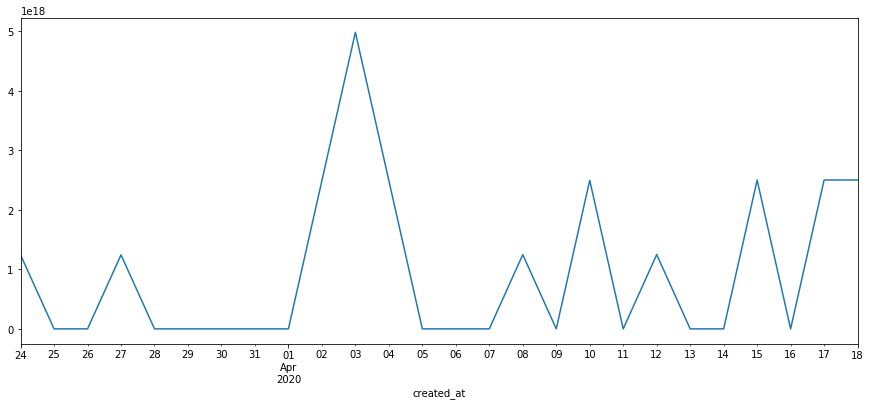

In [18]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

In [19]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [20]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [21]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show();

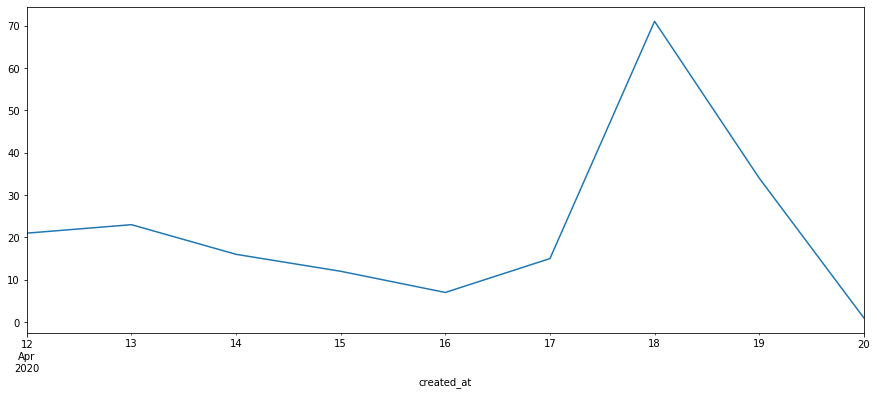

In [22]:
check_tweets('realDonaldTrump')

In [23]:
check_tweets_wordcloud('realDonaldTrump', withall=False)

NameError: name 'TextBlob' is not defined

You can create a tweet as follows:

In [24]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [25]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

You can follow a Tweeter:

In [26]:
# follow:
api.create_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x10d27fd50>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube at 🏠', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Stay Home #WithMe', 'url': 'https://t.co/qkVaJFk2CG', 'entities': {'url': {'urls': [{'url': 'https://t.co/qkVaJFk2CG', 'expanded_url': 'https://www.youtube.com/', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 72431914, 'friends_count': 1085, 'listed_count': 82132, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 3136, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 25346, 'lang': None, 'status': {'created_at': 'Mon Apr 20 05:44:01 +0000 2020', 'id': 1252110754259406848, 'id_str': '1252110754259406848', 'text': "Start your week with this 'Perfect' kalimba cover by Vietnamese creator Trúc Ly → https://t.co/eRDPRHIiTC https://t.co/B9mnvPeM5p", 'truncated': Fals

or unfollow:

In [27]:
# unfollow:
api.destroy_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x10d27fd50>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube at 🏠', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Stay Home #WithMe', 'url': 'https://t.co/qkVaJFk2CG', 'entities': {'url': {'urls': [{'url': 'https://t.co/qkVaJFk2CG', 'expanded_url': 'https://www.youtube.com/', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 72431913, 'friends_count': 1085, 'listed_count': 82132, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 3136, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 25346, 'lang': None, 'status': {'created_at': 'Mon Apr 20 05:44:01 +0000 2020', 'id': 1252110754259406848, 'id_str': '1252110754259406848', 'text': "Start your week with this 'Perfect' kalimba cover by Vietnamese creator Trúc Ly → https://t.co/eRDPRHIiTC https://t.co/B9mnvPeM5p", 'truncated': Fals

>
>
>
>
>

>
>




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



